In [9]:
# 기술통계
import numpy as np
import pandas as pd


df = pd.read_csv('./data/student_scores_em.csv',
                 index_col='student number')
display(df.head())
print(df.shape)

# 영어성적을 가지고 있는 Series를 생성
scores = df['english'][:10]

print(scores)

# 1변수(1차원)를 가지고 있는 DataFrame도 하나 생성
scores_df = pd.DataFrame(scores)
display(scores_df)

# 영어 성적의 평균 구하기
print(scores.mean())  # 55.0  # Series의 메소드를 이용해서 구함
print(np.mean(scores))  # Numpy의 mean()함수 이용
print(scores_df.mean())  # DataFrame의 메소드를 이용, 단, 결과가 Series로 출력됨

# 영어 성적의 중위값 구하기
print(np.median(scores))   # 56.5

# 최빈값 구하기, pandas의 mode()
print(pd.Series([1, 1, 1, 2, 2, 3]).mode())  # 1

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


(50, 2)
student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
Name: english, dtype: int64


,english
student number,
1,42
2,69
3,56
4,41
5,57
6,48
7,65
8,49
9,65


55.0
55.0
english    55.0
dtype: float64
56.5


In [34]:
df = pd.read_csv('./data/student_scores_em.csv',
                 index_col='student number')
# display(df.head())
# print(df.shape)

# 영어성적을 가지고 있는 Series를 생성
scores = df['english'][:10]


# 1변수(1차원)를 가지고 있는 DataFrame도 하나 생성
scores_df = pd.DataFrame(scores)
display(scores_df)

# 영어성적에 대한 편차(deviation)을 구해봐요
deviation = scores - np.mean(scores)
print(deviation.mean())  # 0.0 편차의 평균은 당연히 0임

# variance(분산) 구하기
# 편차의 제곱의 평균 구하기
print(np.mean(deviation ** 2))  #86.0
print(np.var(deviation))  # 86.0  # numpy로 구한것
print(scores_df.var())  # DataFrame 모든 column에 대해서 variance를 구해요  # 불편분산
                        # 95.555556
# numpy로 구한 분산과 pandas로 구한 분산이 다름!
# 분산은 두가지가 있음
# 표본분산과 불편분산
# 표본분산 : 우리가 알고 있는 분산
# 불편분산 : n으로 나누어 평균을 구하는게 아니라 n-1로 나눔
# 통계학에서 기본적으로 사용하는 분산은 불편분산
# pandas는 기본적으로 불편분산을 사용하고 numpy는 표본분산 이용
# pandas는 표본분산을 구하려면?
print(scores_df.var(ddof=0))  # english    86.0   ddof=0 옵션을 줘서 계산하면
                              # 표본분산으로 계산되요!

print(np.sqrt(np.var(scores)))  # 9.273618495495704 => standard deviation(표준편차)
print(np.std(scores))  # 9.273618495495704

,english
student number,
1,42
2,69
3,56
4,41
5,57
6,48
7,65
8,49
9,65


0.0
86.0
86.0
english    95.555556
dtype: float64
english    86.0
dtype: float64
9.273618495495704
9.273618495495704


In [16]:
df = pd.read_csv('./data/student_scores_em.csv',
                 index_col='student number')
# display(df.head())
# print(df.shape)

# 영어성적을 가지고 있는 Series를 생성
scores = df['english'][:10]


# 1변수(1차원)를 가지고 있는 DataFrame도 하나 생성
scores_df = pd.DataFrame(scores)
display(scores_df)

# 사분위 값을 구하는 numpy 함수
Q1 = np.percentile(scores,25)  # 1사분위
Q2 = np.percentile(scores,50)  # 2사분위 = 중위값 = median
Q3 = np.percentile(scores,75)  # 3사분위

IQR = Q3 -Q1
print(IQR)  # 15.0


,english
student number,
1,42
2,69
3,56
4,41
5,57
6,48
7,65
8,49
9,65


15.0


In [35]:
df = pd.read_csv('./data/student_scores_em.csv',
                 index_col='student number')
# display(df.head())
# print(df.shape)

# 영어성적을 가지고 있는 ndarray를 생성
scores = df['english'].values
print(scores)

# 특정 구간에 몇개의 데이터가 포함되는지를 알려주는 numpy함수
freq, tmp = np.histogram(scores, bins=10, range=(0,100))
print(tmp)  # 경게값을 구할 수 있음(tmp)
print(freq)  # 각 bin안의 도수(frequency)

# DataFrame으로 도수분포표 표현

# 먼저 행 index부터 만들자! (list comprehension)
freq_class = [str(i) + '~' +str(i+10) for i in range(0,100,10)] 
print(freq_class)

freq_dist_df = pd.DataFrame({'Frequency' : freq},
                              index=freq_class)
display(freq_dist_df)

# class mark
class_mark = [(i + (i+10)) / 2 for i in range(0,100,10)] 
freq_dist_df['class_mark'] = class_mark
display(freq_dist_df)

# 상대 도수(relative frequency)
rel_freq = freq/freq.sum()
freq_dist_df['rel_freq'] = rel_freq

display(freq_dist_df)

# 누적 상대 도수(cumulative relative frequency)
print(rel_freq)
print(np.cumsum(rel_freq))
freq_dist_df['cum_rel_freq'] = np.cumsum(rel_freq)
display(freq_dist_df)

[42 69 56 41 57 48 65 49 65 58 70 47 51 64 62 70 71 68 73 37 65 65 61 52
 57 57 75 61 47 54 66 54 54 42 37 79 56 62 62 55 63 57 57 67 55 45 66 55
 64 66]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[ 0  0  0  2  8 16 18  6  0  0]
['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']


,Frequency
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0
90~100,0


,Frequency,class_mark
0~10,0,5.0
10~20,0,15.0
20~30,0,25.0
30~40,2,35.0
40~50,8,45.0
50~60,16,55.0
60~70,18,65.0
70~80,6,75.0
80~90,0,85.0
90~100,0,95.0


,Frequency,class_mark,rel_freq
0~10,0,5.0,0.00
10~20,0,15.0,0.00
20~30,0,25.0,0.00
30~40,2,35.0,0.04
40~50,8,45.0,0.16
50~60,16,55.0,0.32
60~70,18,65.0,0.36
70~80,6,75.0,0.12
80~90,0,85.0,0.00
90~100,0,95.0,0.00


[0.   0.   0.   0.04 0.16 0.32 0.36 0.12 0.   0.  ]
[0.   0.   0.   0.04 0.2  0.52 0.88 1.   1.   1.  ]


,Frequency,class_mark,rel_freq,cum_rel_freq
0~10,0,5.0,0.00,0.00
10~20,0,15.0,0.00,0.00
20~30,0,25.0,0.00,0.00
30~40,2,35.0,0.04,0.04
40~50,8,45.0,0.16,0.20
50~60,16,55.0,0.32,0.52
60~70,18,65.0,0.36,0.88
70~80,6,75.0,0.12,1.00
80~90,0,85.0,0.00,1.00
90~100,0,95.0,0.00,1.00


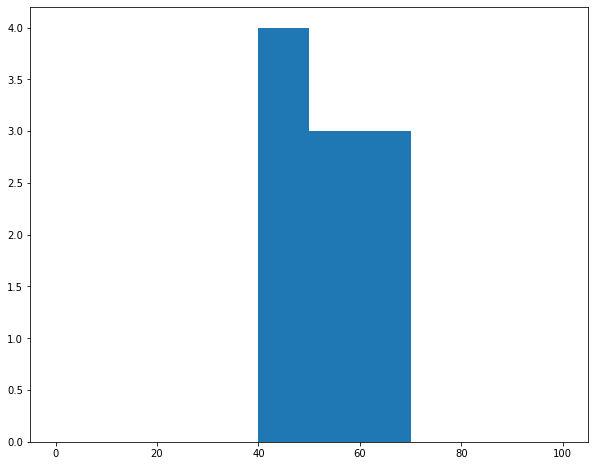

In [28]:
# 1차원 데이터를 통해 histogram을 그리자
##########

import matplotlib.pyplot as plt

df = pd.read_csv('./data/student_scores_em.csv',
                 index_col='student number')
# display(df.head())
# print(df.shape)

# 영어성적을 가지고 있는 Series를 생성
scores = df['english'][:10]

# 그래프를 그려보자
figure = plt.figure(figsize=(10,8))

ax = figure.add_subplot(1,1,1)

# matplotlib을 이용해서 histogram을 그리자
ax.hist(scores, bins=10, range=(0,100))
plt.show()



In [29]:
# boxplot
# matplotlib을 이용해서 그려보자
# 데이터의 분포와 이상치 여부를 알 수 있음

import matplotlib.pyplot as plt

df = pd.read_csv('./data/student_scores_em.csv',
                 index_col='student number')
# display(df.head())
# print(df.shape)

# 영어성적을 가지고 있는 ndarray를 생성
scores = df['english'].values

fig = plt.figure(figsize=(10,6))
#########3

<Figure size 720x432 with 0 Axes>

,english,mathmatics
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78
J,58,82


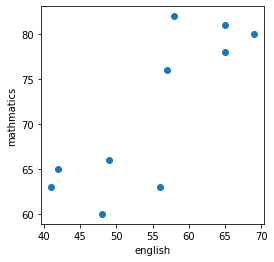

55.0 71.4


In [33]:
df = pd.read_csv('./data/student_scores_em.csv',
                 index_col='student number')
# display(df.head())
# print(df.shape)

en_scores = df['english'][:10]
# print(en_scores)  # series
ma_scores = df['mathematics'][:10]

scores_df = pd.DataFrame({'english' : en_scores.values,
                          'mathmatics' : ma_scores.values},
                          index=['A','B','C','D','E','F','G','H','I','J'])
display(scores_df)
figure=plt.figure(figsize=(4,4))
ax=figure.add_subplot(1,1,1)

ax.scatter(en_scores,ma_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathmatics')

plt.show()

# 영어와 수학의 평균  구하기
print(en_scores.mean(), ma_scores.mean())